# 3.	Analysis of the outcomes of the experiment

<br id = 'overview' \br>
##  Overview of the dataframe

As first thing we import the libraries needed trough the notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the csv output of the survey

In [2]:
df =  pd.read_csv('expcecon.csv')

Let's see the shape of our dataset

In [3]:
df.shape

(94, 3)

We have 96 observations and, as we can see below, we also have 3 columns indicating the answer to the questions: the first two are from the comparative condition and the last one is from the non-comparative condition.  

In [4]:
df.head()

,Q1,Q2,Q3
0,60.0,45.0,NaN
1,NaN,NaN,20.0
2,59.0,30.0,NaN
3,NaN,NaN,20.0
4,NaN,NaN,10.0


### Data manipulation

We can clearly observe that we have missing values, this is due to the fact that people who answered the first two questions did not answer the third one, we're going to modify the dataset so to make it easier to analyze.

We now add a column with a dummy variable to indicate whether the subject has participated to condition 0 (Comparative condition) o condition 1 (non-comparative condition)

In [5]:
df['Condition'] = 0

In [6]:
for i in range(df.shape[0]):
    if df['Q1'].isnull()[i] == True:
        df['Condition'][i] = 1
    else: 
        df['Condition'][i] = 0

C:\Users\a_mon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\a_mon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df.head()

,Q1,Q2,Q3,Condition
0,60.0,45.0,NaN,0
1,NaN,NaN,20.0,1
2,59.0,30.0,NaN,0
3,NaN,NaN,20.0,1
4,NaN,NaN,10.0,1


### Data visualization

We can now observe the distribution of the scores using a violin plot, which is more intuitive and more compact than a histogram

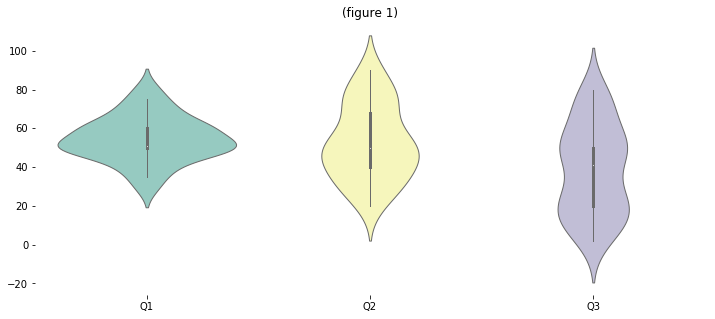

In [8]:
plt.figure(figsize=(12, 5))
# Draw a violinplot with a narrower bandwidth than the default
ax = sns.violinplot(data=df[['Q1','Q2','Q3']], palette="Set3",linewidth=1)
sns.despine(left=True, bottom=True)
ax.set_title('(figure 1)')
plt.show()

We observe that the distribution for Q1 is more concentrated on 50, which is natural as it is the expected value of the bet. For Q2 the mean is also on 50 (maybe it's a bit lower), but variance is higher, showing that people are less confident about their choices.   


Q3 has a more interesting shape, this might be due to different preferences.
Even though Q2 and Q3 are the answers to the same question, the fact that people are more convinced about Q2 might be due to anchoring problems (i.e. people might still think probabilities are near 50, and their answers depend on their risk preferences because what they probably did is adjust their expecatation about the probabilities, a bit lower or a bit higher than 50)

<br id = 'Q1' \br>
#### Q1

We now analyze the answers to the question Q1, i.e.

Suppose you have to pay a fee, but you have a second option. You can either play a game or pay the fee instead.
There is an urn which contains a total of 100 balls: 50 white balls and 50 black balls. You can choose a color and pick one ball from the urn.
If the color you choose comes out, you don't have to pay the fee, but you will have to pay €100 if you pick a ball of the other color.
What is the maximum amount you are willing to pay the fee rather than playing this "game"?


In [9]:
df['Q1'].describe()

count    47.000000
mean     54.638298
std      11.617875
min      30.000000
25%      50.000000
50%      51.000000
75%      60.000000
max      80.000000
Name: Q1, dtype: float64

<br id = 'Q2' \br>
#### Q2

We now analyze the answers to the question Q2, i.e.

Now, the game is different: the urn still contains a total of 100 balls, but now a computer randomly chooses the number of white balls, the others are black. You can choose a color and pick one ball from the urn.
If the color you choose comes out, you don't have to pay the fee, but you will have to pay €100 if you pick a ball of the other color.
What is the maximum amount you are willing to pay the fee rather than playing this "game"?

In [10]:
df['Q2'].describe()

count    47.000000
mean     52.702128
std      19.387260
min      20.000000
25%      40.000000
50%      50.000000
75%      68.000000
max      90.000000
Name: Q2, dtype: float64

<br id = 'Q3' \br>
#### Q3

We now analyze the answers to the question Q3, i.e.

Suppose you have to pay a fee, but you have a second option. You can either play a game or pay the fee instead.
There is an urn which contains a total of 100 balls: 50 white balls and 50 black balls. You can choose a color and pick one ball from the urn.
If the color you choose comes out, you don't have to pay the fee, but you will have to pay €100 if you pick a ball of the other color.
What is the maximum amount you are willing to pay the fee rather than playing this "game"?

In [11]:
df['Q3'].describe()

count    47.000000
mean     38.595745
std      23.275906
min       2.000000
25%      20.000000
50%      41.000000
75%      50.000000
max      80.000000
Name: Q3, dtype: float64

In [12]:
# replace nan in place
dl = df.copy()
a = (df['Q1'].isnull())
values = df['Q3'].dropna()
dl.loc[a, 'Q1'] = values
#same

<br id = 'Analyzing effects of risk aversion to preferences in ambiguity' \br>
#### Analyzing effects of risk aversion on preferences in ambiguity

We can already observe that the mean for Q1 is only slightly higher than the mean of Q2, i.e. people answer to the question involving risky outcomes almost in the same way to the question with ambiguous outcomes, and this might be due to anchoring.

More interestingly, people maintain their preferences in risk also for ambiguity.
In fact, it seems that people who tend to be more risk averse, when they are faced with ambuiguous probabilities, for losses, seem to be less willing to take the risk to play the game of chance.

However, we will see this more in detail:

In [13]:
higher_mean = []
for i in range(df.shape[0]):
    if df['Q1'].values[i]> 50:
        higher_mean.append(df['Q2'].values[i])
        print(f"individual {i} has answered {df['Q1'].values[i]} to "
              +f"the first answer and {df['Q2'].values[i]} to "
              +f"the second one")
print(f"the mean for Q2 for risk averse individuals is: "
      +f"{np.sum(higher_mean)/np.size(higher_mean)},")
print(f"while the mean for Q2 the total subjects in the comparative setting" 
      +f"is:{(df['Q2'].sum())/(df['Q2'].shape[0] - np.sum(df['Q2'].isnull()))}")

individual 0 has answered 60.0 to the first answer and 45.0 to the second one
individual 2 has answered 59.0 to the first answer and 30.0 to the second one
individual 5 has answered 55.0 to the first answer and 35.0 to the second one
individual 8 has answered 65.0 to the first answer and 80.0 to the second one
individual 12 has answered 70.0 to the first answer and 30.0 to the second one
individual 13 has answered 60.0 to the first answer and 55.0 to the second one
individual 18 has answered 60.0 to the first answer and 75.0 to the second one
individual 22 has answered 55.0 to the first answer and 40.0 to the second one
individual 27 has answered 80.0 to the first answer and 90.0 to the second one
individual 30 has answered 60.0 to the first answer and 40.0 to the second one
individual 34 has answered 60.0 to the first answer and 90.0 to the second one
individual 37 has answered 70.0 to the first answer and 50.0 to the second one
individual 44 has answered 80.0 to the first answer and 

In the comparative settings, individuals who are more risk averse are also more ambuiguity averse as we can observe that the mean answer for the question involving ambiguous probabilities is higher for those who have given an answer higher than 50 for the question with known probabilities.  

In [14]:
lower_mean = []
for i in range(df.shape[0]):
    if df['Q1'].values[i]< 50:
        lower_mean.append(df['Q2'].values[i])
        print(f"individual {i} has answered {df['Q1'].values[i]} to "
              +f"the first answer and {df['Q2'].values[i]} to "
              +f"the second one")
print(f"the mean for Q2 for risk prone individuals is:" 
      +f"{np.sum(lower_mean)/np.size(lower_mean)},")
print(f"while the mean for Q2 the total subjects in the comparative setting"
      +f"is:{(df['Q2'].sum())/(df['Q2'].shape[0] - np.sum(df['Q2'].isnull()))}")

individual 15 has answered 45.0 to the first answer and 40.0 to the second one
individual 20 has answered 40.0 to the first answer and 25.0 to the second one
individual 24 has answered 35.0 to the first answer and 20.0 to the second one
individual 29 has answered 40.0 to the first answer and 51.0 to the second one
individual 31 has answered 40.0 to the first answer and 30.0 to the second one
individual 32 has answered 40.0 to the first answer and 40.0 to the second one
individual 45 has answered 30.0 to the first answer and 20.0 to the second one
individual 63 has answered 49.0 to the first answer and 49.0 to the second one
individual 73 has answered 30.0 to the first answer and 30.0 to the second one
individual 74 has answered 49.0 to the first answer and 66.0 to the second one
individual 75 has answered 49.0 to the first answer and 75.0 to the second one
the mean for Q2 for risk prone individuals is:40.54545454545455,
while the mean for Q2 the total subjects in the comparative settin

In the comparative settings, individuals who are less risk averse are also less ambuiguity averse as we can observe that the mean answer for the question involving ambiguous probabilities is lower for those who have given an answer lower than 50 for the question with known probabilities.  

In [15]:
ind_mean = []
for i in range(df.shape[0]):
    if df['Q1'].values[i]== 50:
        ind_mean.append(df['Q2'].values[i])
        print(f"individual {i} has answered {df['Q1'].values[i]} to "
              +f"the first answer and {df['Q2'].values[i]} to the"
              +f" second one")
print(f"the mean for Q2 for risk indifferent individuals is:" 
      +f"{np.sum(ind_mean)/np.size(ind_mean)},")
print(f"while the mean for Q2 the total subjects in the comparative setting "
      +f"is:{(df['Q2'].sum())/(df['Q2'].shape[0] - np.sum(df['Q2'].isnull()))}")

individual 9 has answered 50.0 to the first answer and 55.0 to the second one
individual 16 has answered 50.0 to the first answer and 30.0 to the second one
individual 25 has answered 50.0 to the first answer and 44.0 to the second one
individual 40 has answered 50.0 to the first answer and 50.0 to the second one
individual 46 has answered 50.0 to the first answer and 75.0 to the second one
individual 47 has answered 50.0 to the first answer and 40.0 to the second one
individual 50 has answered 50.0 to the first answer and 50.0 to the second one
individual 54 has answered 50.0 to the first answer and 50.0 to the second one
individual 58 has answered 50.0 to the first answer and 50.0 to the second one
individual 70 has answered 50.0 to the first answer and 50.0 to the second one
individual 72 has answered 50.0 to the first answer and 65.0 to the second one
individual 89 has answered 50.0 to the first answer and 70.0 to the second one
the mean for Q2 for risk indifferent individuals is:5

Most of those who have answered 50, gave a similar answer to Q2, they might have done that because of anchoring problems.   
This might lead us to suspect than also other individuals have had the same problem, but we cannot say that for sure.
It is also possible that they are risk indifferent and ambiguity prone/averse at the same time.

The mean for Q2 is even lower in non comparative settings. In that case, however, we have no way of knowing the risk preferences of the respondents.

#### Non-comparative setting

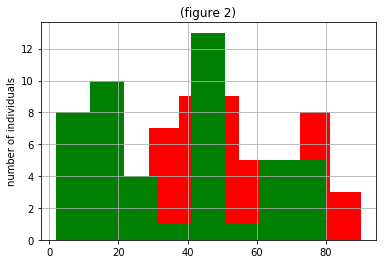

In [16]:
ax = df['Q2'].hist(color='r',bins = 8)
df['Q3'].hist(color='g',bins = 8)
ax.set_ylabel("number of individuals")

ax.set_title('(figure 2)')
plt.show()


These two histograms represents the answer to the question involving ambiguous probabilities: the one in red represents the answers in the comparative setting, while the one in green represents the answers in the non-comparative setting.
As we can observe, in the non-comparative setting, people tend to be more willing to participate in the "lottery", even thought there is still someone who has answered with values as high as 90.